**Step 1-We need to call the library (Maybe we will need more?!)****

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import plotly.graph_objects as go
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

**Step 2 -Get data from the link**

In [29]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [30]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


<AxesSubplot:title={'center':' the sales of the product with advertising cost'}>

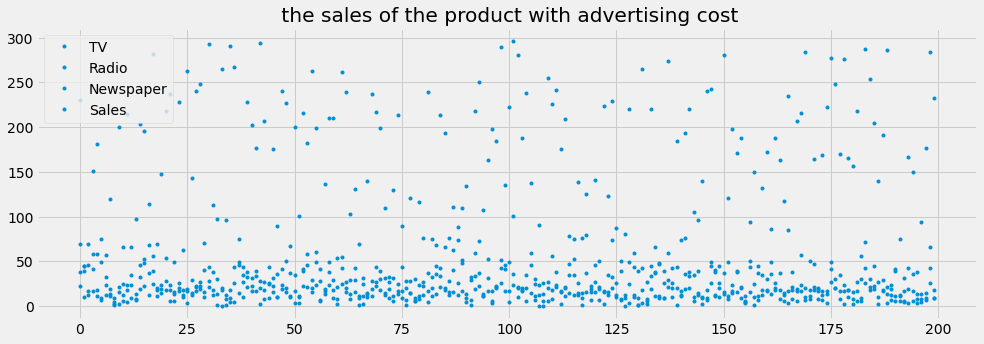

In [31]:
data.plot(style='.', figsize =(15,5),
          color=color_pal[0],
          title =' the sales of the product with advertising cost')


<AxesSubplot:title={'center':' the sales of the product '}>

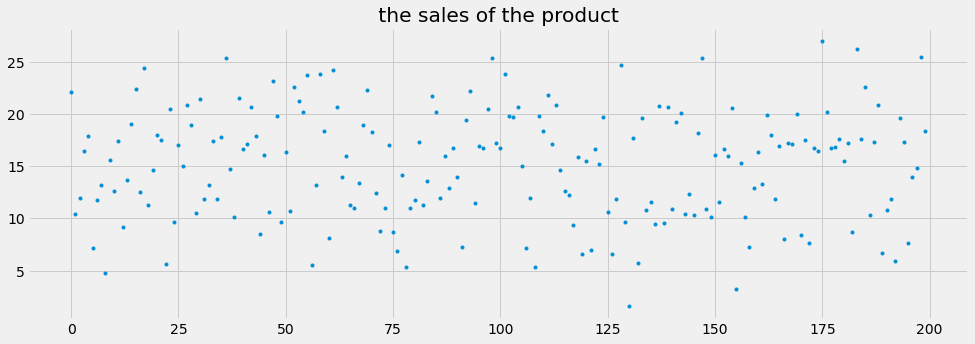

In [32]:
data["Sales"].plot(style='.', figsize =(15,5),
          color=color_pal[0],
          title =' the sales of the product ')


**Visualize the relationship between the amount spent on advertising on TV and units sold:**Visualize the relationship between the amount spent on advertising on TV and units sold:

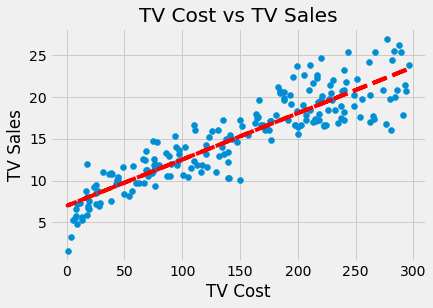

In [35]:
#Select the columns
tv_cost = data["TV"]
tv_sales = data["Sales"]

# Create a scatter plot
plt.scatter(tv_cost, tv_sales)

# Add a trendline
z = np.polyfit(tv_cost, tv_sales, 1)
p = np.poly1d(z)
plt.plot(tv_cost,p(tv_cost),"r--")

# Add labels and a title
plt.xlabel("TV Cost")
plt.ylabel("TV Sales")
plt.title("TV Cost vs TV Sales")

# Show the plot
plt.show()

The "r--" argument passed to the plt.plot function is a string that specifies the color and style of the line that is plotted.

The "r" part stands for red, which is the color of the line. The "--" part specifies that the line should be plotted as a dashed line.

In Matplotlib, you can specify the color and style of a line by passing a string as the third argument to the plt.plot function. The first character of the string specifies the color, and the second (and optional third) characters specify the style.

Here are some examples:

"b-": blue line (solid)
"g--": green line (dashed)
"r:": red line (dotted)
"c-.": cyan line (dash-dot)
You can also use the short version of the color code, for example:

"b" for blue
"g" for green
"r" for red
"c" for cyan
If you don't specify a color or style, the default is a solid black line ("k-")


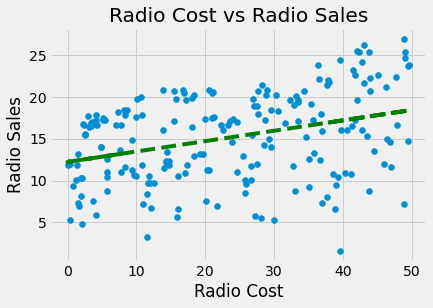

In [39]:
#Visualize the relationship between the amount spent on advertising on Radio and units sold:
#Select the columns
radio_cost=data["Radio"]
radio_sales=data["Sales"]
# Create a scatter plot
radio_scatter=plt.scatter(radio_cost, radio_sales)

# Add a trendline
z = np.polyfit(radio_cost, radio_sales, 1)
p = np.poly1d(z)
plt.plot(radio_cost,p(radio_cost),"g--")

# Add labels and a title
plt.xlabel("Radio Cost")
plt.ylabel("Radio Sales")
plt.title("Radio Cost vs Radio Sales")

# Show the plot
plt.show()



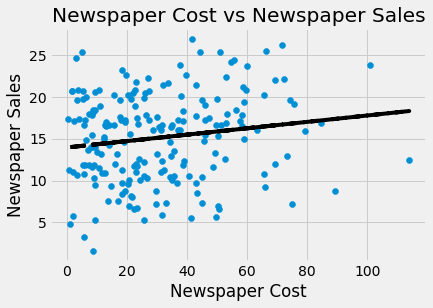

In [41]:
#Visualize the relationship between the amount spent on advertising on Newspaper and units sold:
newspaper_cost=data["Newspaper"]
newspaper_sales=data["Sales"]
# Create a scatter plot
newspaper_scatter=plt.scatter(newspaper_cost, newspaper_sales)

# Add a trendline
z = np.polyfit(newspaper_cost, newspaper_sales, 1)
p = np.poly1d(z)
plt.plot(newspaper_cost,p(newspaper_cost),"k--")

# Add labels and a title
plt.xlabel("Newspaper Cost")
plt.ylabel("Newspaper Sales")
plt.title("Newspaper Cost vs Newspaper Sales")

# Show the plot
plt.show()

In [43]:
#Find the correlation

# Calculate the correlation between all columns and the "sales" column
correlations = data.corr()["Sales"]

# Print the correlations
print(correlations)


TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64


In [54]:
#Train and Test Split
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame called "data"
# and your target variable is in a column called "target"


X = data.drop(columns='Sales')
y = data['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I am not sure about is the data imbalanced or not, we will check it with strafity after that.

In [57]:
#Create our model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[10:05:28] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15.55705	validation_1-rmse:14.75859
[100]	validation_0-rmse:6.04134	validation_1-rmse:5.51484
[200]	validation_0-rmse:2.50590	validation_1-rmse:2.23343
[300]	validation_0-rmse:1.25315	validation_1-rmse:1.33089
[400]	validation_0-rmse:0.87321	validation_1-rmse:1.20938
[500]	validation_0-rmse:0.73167	validation_1-rmse:1.19128
[600]	validation_0-rmse:0.66043	validation_1-rmse:1.18548
[640]	validation_0-rmse:0.64213	validation_1-rmse:1.19473


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

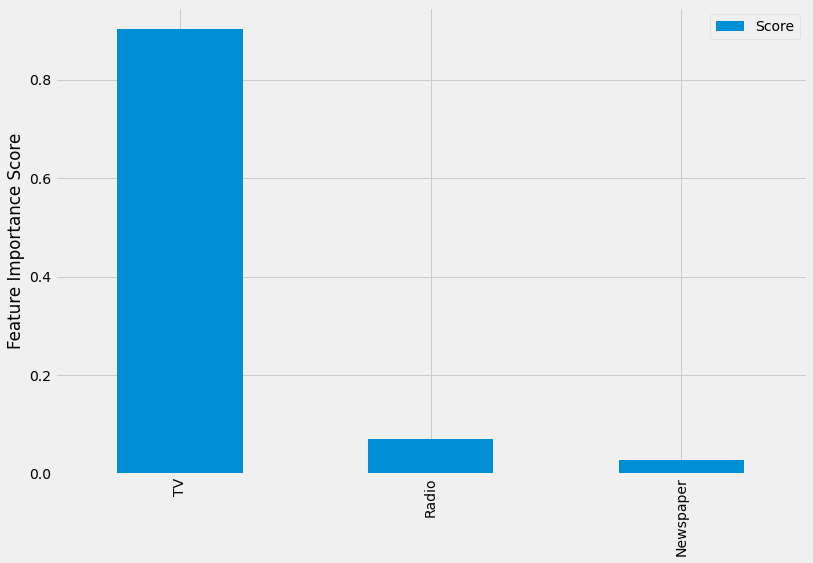

In [48]:
# Get feature importance scores
importance_scores = reg.feature_importances_

# Create a dataframe to store the feature importance scores
importance_df = pd.DataFrame(importance_scores, index=X_train.columns, columns=["Score"])

# Sort the dataframe by feature importance score
importance_df.sort_values(by="Score", ascending=False, inplace=True)

# Plot the feature importance scores
importance_df.plot(kind='bar', figsize=(12, 8))
plt.ylabel("Feature Importance Score")
plt.show()

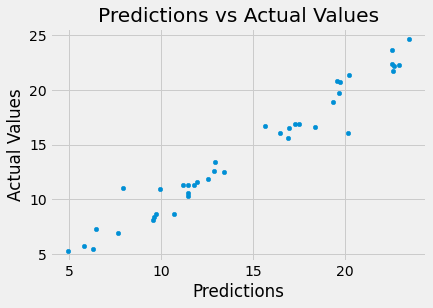

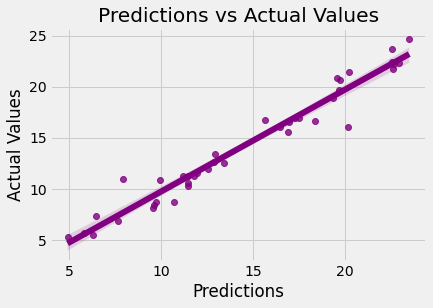

In [63]:
#Forecast on Test

y_pred = reg.predict(X_test)
test_predictions = X_test.copy()
test_predictions['prediction'] = y_pred
test_predictions['Sales'] = y_test

# Plot the predictions against the actual values
test_predictions.plot(x='prediction', y='Sales', kind='scatter')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Predictions vs Actual Values')
plt.show()

# Add a trendline
sns.regplot(x='prediction', y='Sales', data=test_predictions, color='purple')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Predictions vs Actual Values')
plt.show()

In [72]:
#Score(RMSE)
from sklearn.metrics import mean_squared_error

# Calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("RMSE:", rmse)

RMSE: 1.1836874136180577
